In [25]:
# ======== importing modules ========
from pytransit import MandelAgol
import glob, os
from os import listdir
from os.path import isfile, join
import fnmatch
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.nan)
import pandas as pd

fs = 22; ms = 4 #fontsize, markersize

#========== Karen's inverse weighted binning function =======
def Bin_func(time,flux,error,binsize):
    good = np.where(np.isfinite(time)) # finding where values are finite and "Not a Number (NaN)" or +/- infinite (inf)
    timefit = time[good] 
    fluxfit = flux[good] #using indices where values are finite, find where times, flux and errors are also finite
    errfit  = error[good]
    timemax = np.max(timefit) #find max time (or last time measurement)
    timemin = np.min(timefit) #find min time (or first time measurement)
    npoints = len(timefit)    #find number of data points
    nbins   = int(math.ceil((timemax - timemin)/binsize)) #binsize in days to nearest interger
    bintime = np.full((nbins,), np.nan) 
    binflux = np.full((nbins,), np.nan) #creating an empty array full of NaNs to fill in below
    binerr  = np.full((nbins,), np.nan)
    for i in range(0,nbins-1):
        tobin = [np.where( (timefit >= (timemin + i*binsize)) & (timefit < (timemin + (i+1)*binsize)) )] #with given binsize, searching over smaller areas (aka windows) (t-window) to (t+window)
        if tobin[0] != -1:
    #     inverse variance weighted means; read about here: https://en.wikipedia.org/wiki/Inverse-variance_weighting
    
            binflux[i] = ((fluxfit[tobin]/(errfit[tobin]**2.0)).sum()) / ((1.0/errfit[tobin]**2.0).sum())
            bintime[i] = ((timefit[tobin]/(errfit[tobin]**2.0)).sum()) / ((1.0/errfit[tobin]**2.0).sum())
            binerr[i]  = 1.0 / (np.sqrt( (1.0/errfit[tobin]**2.0)).sum() )
    
    good2   = np.where(np.isfinite(bintime)) #checking again for NaNs and infs that might be created by previous step
    bintime = bintime[good2]
    binflux = binflux[good2] 
    binerr  = binerr[good2]
    
    return bintime, binflux, binerr #here you have binned data with averaged values based on the bin sizes you've selected

HOW TO USE FOR LOOPS

In [26]:
# For loops example

# Creating an array of numbers:
A = [ 1, 2, 3, 4, 5] #an array
print "number of elements in array: ", len(A) 
print ""

#printing each element of the array:
for n in range(len(A)): #range by default searches from 0 to your input number
#                           len = length of the array
    print "element",n,": ", A[n]

number of elements in array:  5

element 0 :  1
element 1 :  2
element 2 :  3
element 3 :  4
element 4 :  5


In [27]:
#------------------------------Finding Downloaded TESS Data Files --------------------------------------
path = '/Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean' #location of where I put downloaded files

data = [os.path.join(dirpath, f) # an array of path names to be looped over
    for dirpath, dirnames, files in os.walk(path) #recursively searches through directory
    for f in fnmatch.filter(files, '*.lc')] #finds every file (*) that ends with .lc

print "number of files: ",len(data) #number of files

for d in range(10): #for only 10
# for d in range(len(data)): #for all files
    print "data set #", d+1 ," : ", data[d] #I added the d+1 because python does zero-indexing (https://en.wikipedia.org/wiki/Zero-based_numbering)
    print ""

number of files:  10138
data set # 1  :  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/114888924_sector01_1_1.lc

data set # 2  :  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/114888998_sector01_1_1.lc

data set # 3  :  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/114889623_sector01_1_1.lc

data set # 4  :  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/114891238_sector01_1_1.lc

data set # 5  :  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/114917784_sector01_1_1.lc

data set # 6  :  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/114918729_sector01_1_1.lc

data set # 7  :  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/114918834_sector01_1_1.lc

data set # 8  :  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/114919247_sector01_1_1.lc

data set # 9  :  /Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/114920464_sector01_1_1.lc

data set # 10  :  /Users/felizd/Desktop/Felix/TES

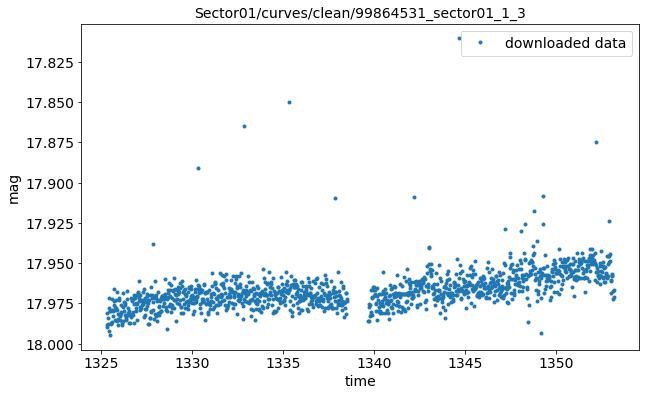

In [28]:
#Here I asked you to try loading in one data set and plotting it up
Set1=np.transpose(np.loadtxt(data[0]))
# using transpose on the loadtxt command allows you to read in columns of data rather than rows


# NOTE: 
# copying and pasting file locations AKA pathnames can sometimes lead you into trouble if the 
# file no longer exists. In this case this is fine, but for hundreds/thousands of files, it 
# would be a pain to search for 1 missing file. As you'll see below, it is better to use for loops.


t=Set1[0]
mag=Set1[1]
err=Set1[2]

#let's plot it up!
from matplotlib import pyplot
fs = 14
pyplot.figure(figsize=(10,6))
pyplot.plot(t,mag,marker='.',linestyle='none',label='downloaded data') 
#by default, pyplot connects data points by lines. We added marker='.' and linestyle='none' to change that.

pyplot.xlabel ("time",fontsize=fs)
pyplot.ylabel ("mag",fontsize=fs)
pyplot.title(str(data[-1][37:-3]),fontsize=fs) 
# that data set used was the last (-1) set in the array of file locations I created.
# I tacked on the [37:-3] part to remove the first 37 and last 3 characters to only show the filename #s.

#TESS data syntax: TESSID_SectorNumber__SectorNumber_CameraNumber
pyplot.gca().invert_yaxis() #remember magnitude scales (brighter=smaller numbers, fainter=bigger numbers)
#                           # so we invert the y axis to show brightest (top) to faintest(bottom)
pyplot.xticks(fontsize=fs)
pyplot.yticks(fontsize=fs)
pyplot.legend(loc='best', fontsize=fs) 
# I set the legend location (loc) to be "best". Pyplot figures where it would be best placed
pyplot.show()

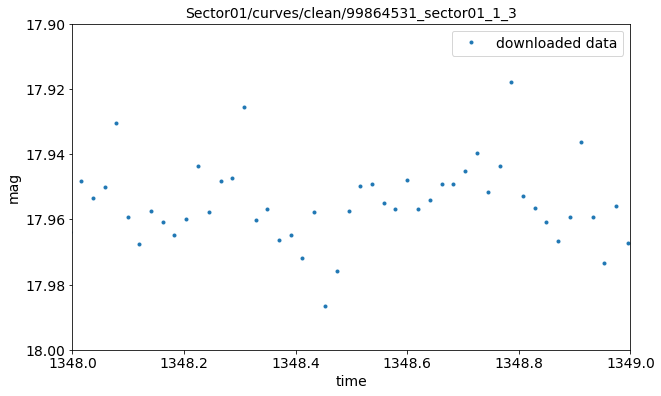

In [29]:
#let's try zooming in between time 1337 and 1338 on x-axis and 18 and 19 on y-axis

fs = 14
pyplot.figure(figsize=(10,6))
pyplot.plot(t,mag,marker='.',linestyle='none',label='downloaded data')
pyplot.xlabel ("time",fontsize=fs)
pyplot.ylabel ("mag",fontsize=fs)
pyplot.title(str(data[-1][37:-3]),fontsize=fs)
pyplot.xticks(fontsize=fs)
pyplot.yticks(fontsize=fs)
pyplot.legend(loc='best', fontsize=fs)
pyplot.xlim(1348,1349)
plt.ylim(17.9,18.0)
pyplot.gca().invert_yaxis() #remember: magnitude has an inverse scale. Brighter = smaller magnitude number and vice versa
pyplot.show()

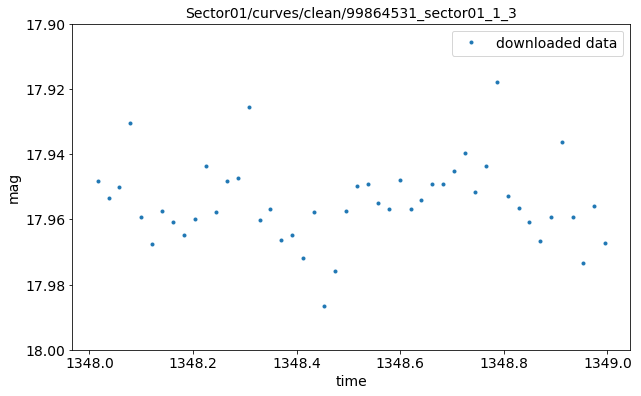

In [30]:
#instead of zooming in, let's try cutting out data.

# the numpy.where command gives you a list of element locations AKA indexes/indices 
# where certain conditions are true. 
indices  = np.where( (t>1348) & (t<1349) )[0]  # here we are searching for 1337.7 < time < 1338

fs = 14
pyplot.figure(figsize=(10,6))

#to apply our cut, we only want array values where our conditions above are true.
#to do this, we use [indices]:

pyplot.plot(t[indices],mag[indices],marker='.',linestyle='none',label='downloaded data')


pyplot.xlabel ("time",fontsize=fs)
pyplot.ylabel ("mag",fontsize=fs)
pyplot.title(str(data[-1][37:-3]),fontsize=fs)
pyplot.xticks(fontsize=fs)
pyplot.yticks(fontsize=fs)
pyplot.legend(loc='best', fontsize=fs)

plt.ylim(17.9,18.0)
pyplot.gca().invert_yaxis()
pyplot.show()

These are the same thing but the first method doesn't cut out data points, it only displays selected ones

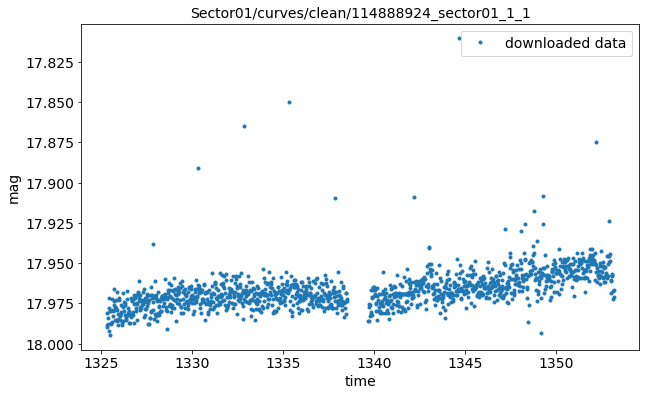

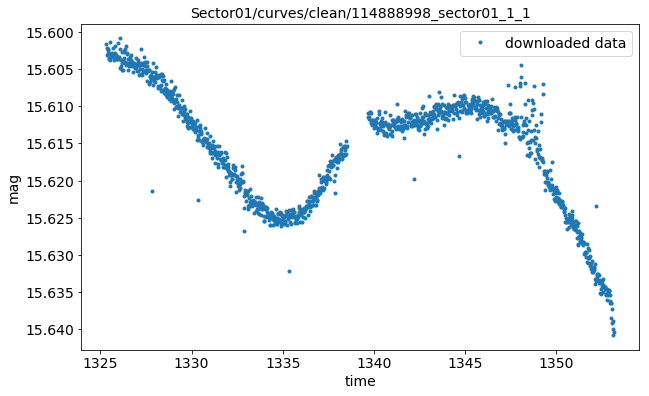

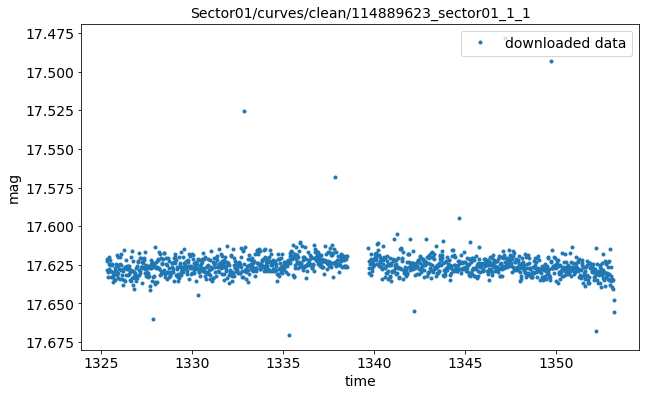

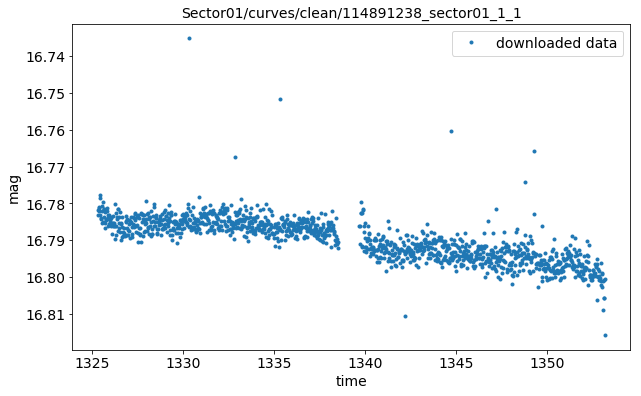

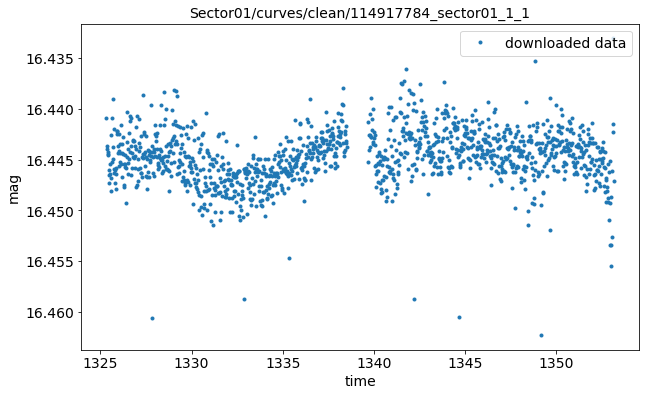

In [31]:

#now let's scale up our data reading and plotting commands to a for loop

# for x in range (len(data)): # for full set of light curves (thousands!)
for x in range (5): 
    Set1=np.transpose(np.loadtxt(data[x])) #reading in data
    t=Set1[0]
    mag=Set1[1] #setting time,mag,err from loaded data
    err=Set1[2]
    fs = 14
    pyplot.figure(figsize=(10,6))
    pyplot.plot(t,mag,marker='.',linestyle='none',label='downloaded data')
    pyplot.xlabel ("time",fontsize=fs)
    pyplot.ylabel ("mag",fontsize=fs)
    pyplot.title(str(data[x][37:-3]),fontsize=fs)
    pyplot.gca().invert_yaxis()
    pyplot.xticks(fontsize=fs)
    pyplot.yticks(fontsize=fs)
    pyplot.legend(loc=1, fontsize=fs)
    pyplot.show()
    

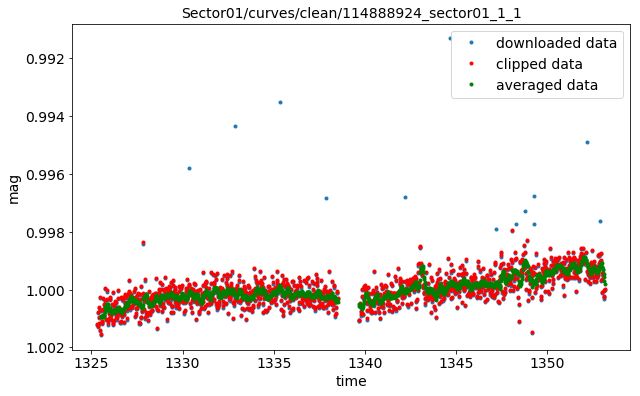

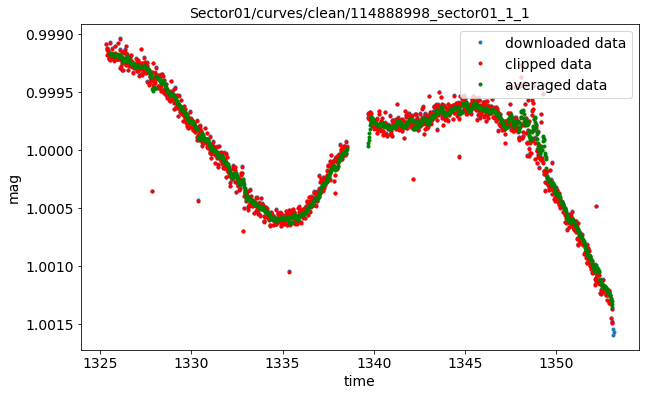

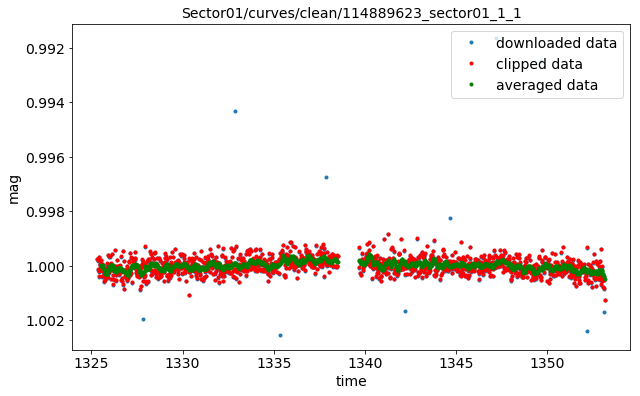

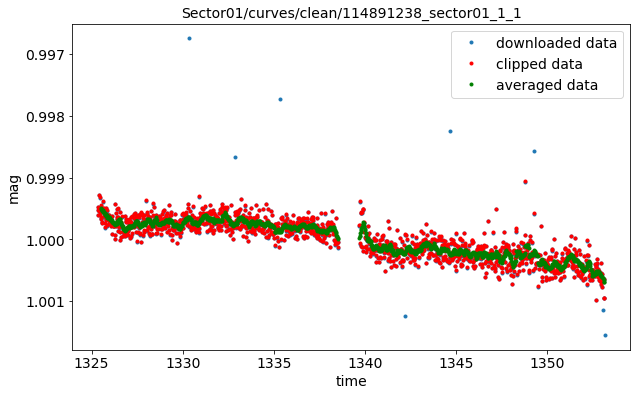

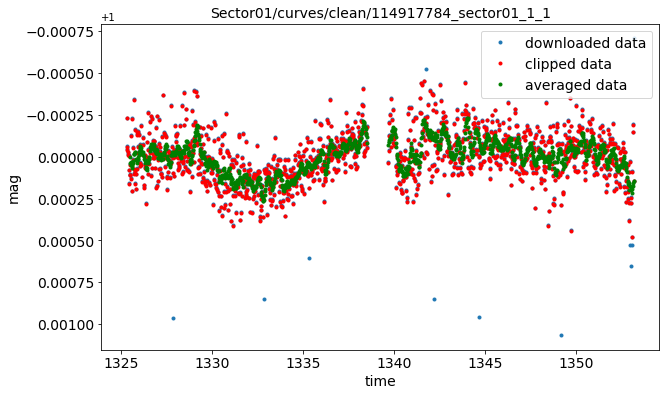

In [32]:
#now let's try cleaning up the data a bit
# first thing we want to try is removing outliers from the data

Nsig=3.0 #the number of standard deviations away from the average value that we want to clip
# for x in range (len(data)): 
for x in range (5): 
    Set1=np.transpose(np.loadtxt(data[x]))
    t=Set1[0]
    mag=Set1[1]
    err=Set1[2]
    fs = 14
    
    np.savetxt ("temp.txt",zip(t,mag,err)) #saving data to a temporary file which will be 
    #                                       written over later
    # vartools has many tools. One of them is a iterative clipper, meaning it will cut 
    # data over and over and over until there are no more outliers.

    os.system("vartools -oneline -i temp.txt -clip "+str(Nsig)+" iter -o temp_VTclipped.txt") #iterative sigma clipping

    VTc=np.transpose(np.loadtxt ("temp_VTclipped.txt")) #loading in cut data
    
    tclip=VTc[0]
    magclip=VTc[1]
    errclip=VTc[2]
    
    #now let's try running a rolling average on our data
    
    window_size = 10  #allows 10 data points in moving window
    magclip_mean = np.array(pd.DataFrame(magclip).rolling(window_size).mean()) 
    
    #Normalizing: This sets our data to be centered around a value of 1. Let's do this for 
    # all 3 versions of magnitude: original, clipped and averaged
    normmag= mag/np.nanmean(mag)
    normmagclip= magclip/np.nanmean(magclip)
    normavg=magclip_mean/np.nanmean(magclip_mean)
    
    
    pyplot.figure(figsize=(10,6))
    pyplot.plot(t,normmag,marker='.',linestyle='none',label='downloaded data',zorder=0)
    pyplot.plot(tclip,normmagclip,marker='.',linestyle='none',label='clipped data', color = 'red',zorder=1)
    pyplot.plot(tclip,normavg,marker='.',linestyle='none',label='averaged data', color = 'green',zorder=2)
    pyplot.xlabel ("time",fontsize=fs)
    pyplot.ylabel ("mag",fontsize=fs)
    pyplot.title(str(data[x][37:-3]),fontsize=fs)
    pyplot.gca().invert_yaxis()
    pyplot.xticks(fontsize=fs)
    pyplot.yticks(fontsize=fs)
    pyplot.legend(loc=1, fontsize=fs)
    
    pyplot.show()
    
    




In [33]:
# in Python, you can use "definitions" to create custom commands that do a number
# of operations in one single line. Below, we're creating a cleanup command

def cleanup(time,mag,err,Nsig,window_size):
    
    #note our inputs for this command are: time, mag, error, 
    #                                      number of sigmas to clip and window size
    
    from astropy.stats import sigma_clip as sig
    
    magclip = sig(mag,sigma_upper=Nsig) #sigma clipping ONLY above baseline and not below
    
    magclip_mean = np.array(pd.DataFrame(magclip).rolling(window_size).mean()) #rolling average
    
    #normalizing
    
    normmag = mag/np.nanmean(mag) #nanmean ignores possible nans in data
    normmagclip = magclip/np.nanmean(magclip)
    normmagavg = magclip_mean/np.nanmean(magclip_mean)
    
    #creating time arrays to match magnitude arrays
    
    print len(normmag), len(normmagclip), len(normmagavg)
    
    # when we run this command, we have to define what our outputs are with "return"
    return normmag, normmagclip, normmagavg

1282 1282 1282


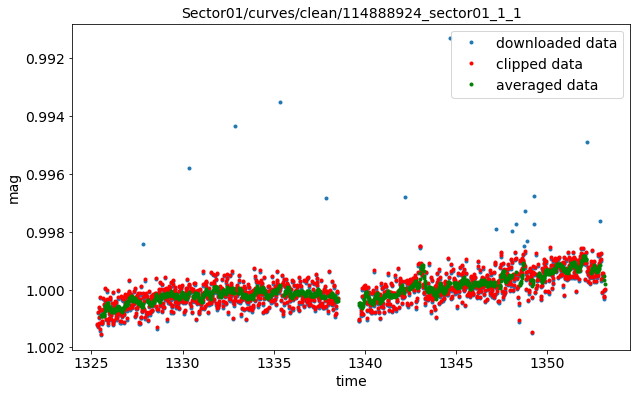

1282 1282 1282


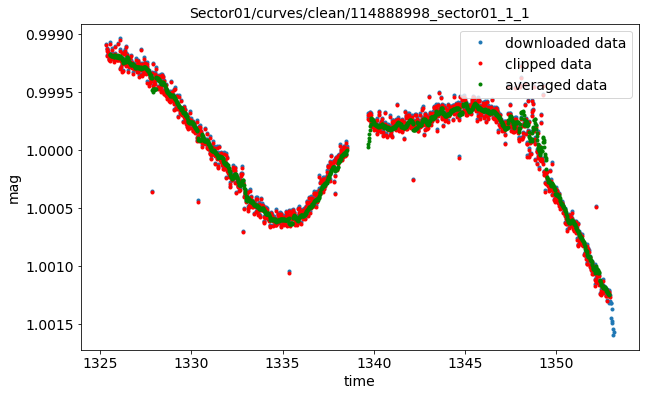

1282 1282 1282


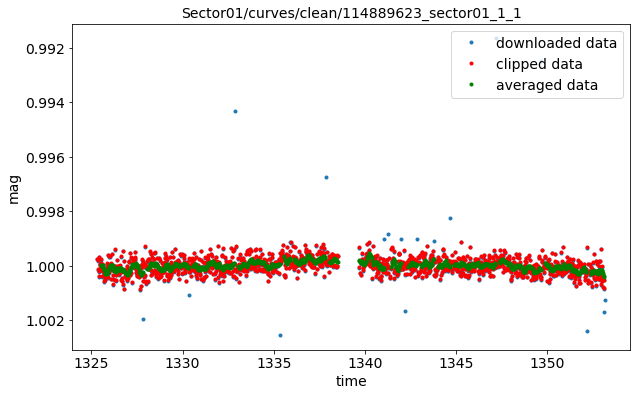

1282 1282 1282


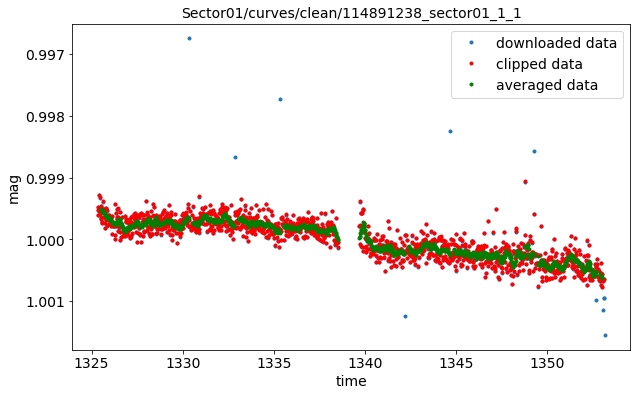

1282 1282 1282


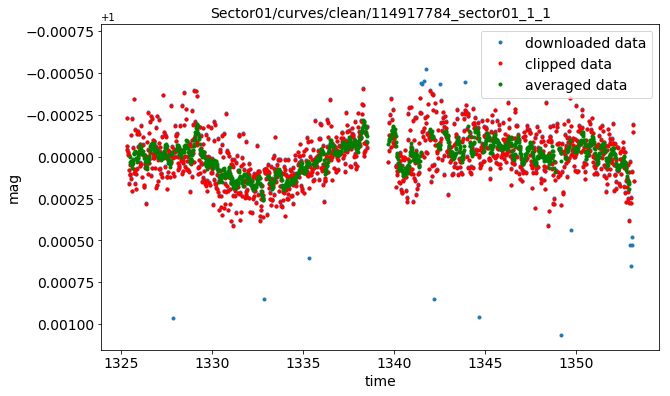

In [34]:
Nsig=3.0; window_size = 10
fs = 14  #fontsize in figures
# for x in range (len(data)): 
for x in range (5): 
    Set1=np.transpose(np.loadtxt(data[x]))
    t=Set1[0]
    mag=Set1[1]
    err=Set1[2]

    
    #one line command with definition and input parameters: 
    normmag, normmagclip, normmagavg = cleanup(t,mag,err,Nsig,window_size) 
    
    
    pyplot.figure(figsize=(10,6))
    pyplot.plot(t,normmag,marker='.',linestyle='none',label='downloaded data',zorder=0)
    pyplot.plot(t,normmagclip,marker='.',linestyle='none',label='clipped data', color = 'red',zorder=1)
    pyplot.plot(t,normmagavg,marker='.',linestyle='none',label='averaged data', color = 'green',zorder=2)
    pyplot.xlabel ("time",fontsize=fs)
    pyplot.ylabel ("mag",fontsize=fs)
    pyplot.title(str(data[x][37:-3]),fontsize=fs)
    pyplot.gca().invert_yaxis()
    pyplot.xticks(fontsize=fs)
    pyplot.yticks(fontsize=fs)
    pyplot.legend(loc=1, fontsize=fs)
    
    pyplot.show()
    
    


